## Условие 1: Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

1.  Скачать следующие данные: kc-house-data и laptop_price
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('kc_house_data.csv', encoding='latin1')
df1 = pd.read_csv('./laptop_price.csv', encoding='latin1')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


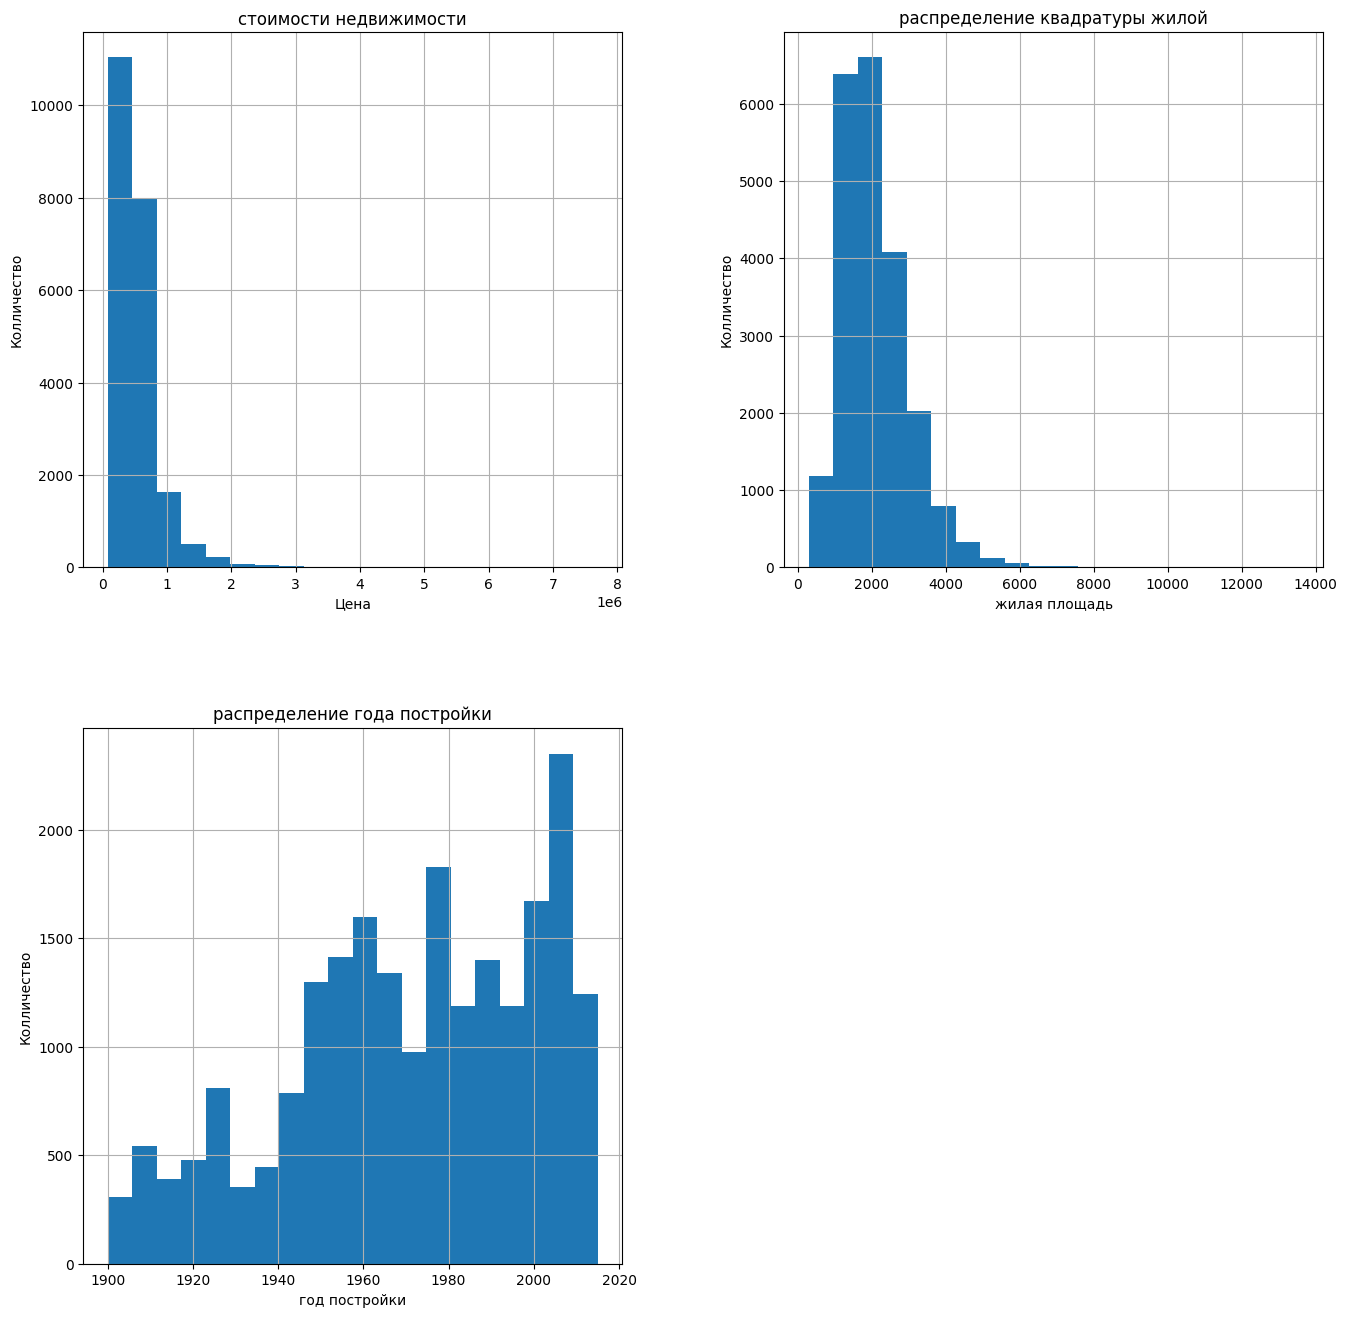

In [36]:
df_features = df[['price','sqft_living','yr_built']]
axarr=df_features.hist(figsize=(16, 16), bins=20, grid=True).flatten()
axarr[0].set_xlabel('Цена')
axarr[0].set_title('стоимости недвижимости')
axarr[1].set_xlabel('жилая площадь')
axarr[1].set_title('распределение квадратуры жилой')
axarr[2].set_xlabel('год постройки')
axarr[2].set_title('распределение года постройки')
for ax in axarr:
    ax.set_ylabel('Колличество')

### Вывод
Из графиков видно: 
1. наибольшее колличество домов находиться в районе стоимости в 0,5 милиона; 
2. наибольшее колличество домов обладает жилой площадью в районе 2000 метров квадратных
3. Застройка домом велась с 1900 года пики строительства были в 1960, 1979 и в 2006 годах.

## Условие 2: 2 задача
1. Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы
2. Изучите распределение этажей домов
2. Изучите распределение состояния домов

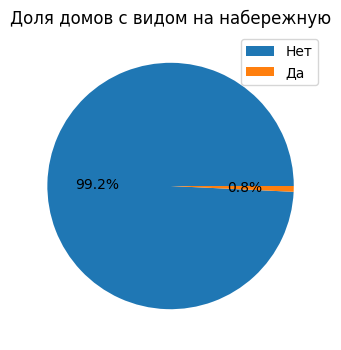

In [81]:
#sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(['Нет', 'Да']);


### Вывод
Из графика видно, что домов с видом на набережную менее одного процента

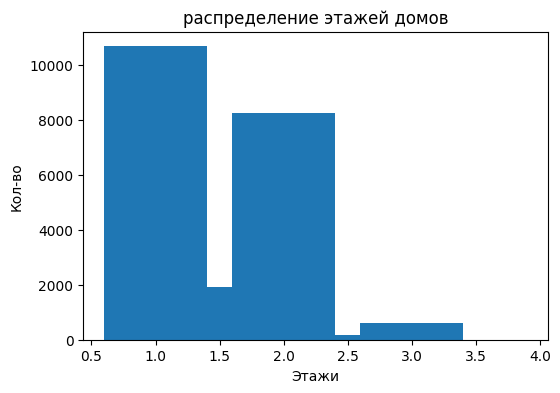

In [41]:
plt.figure(figsize=(6, 4))
plt.bar(df['floors'].unique(), df['floors'].value_counts())
plt.title('распределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Кол-во');
#plt.xticks(rotation=50);

### Вывод
Из графика видно, что значительная часть домов имеет один или два этажа

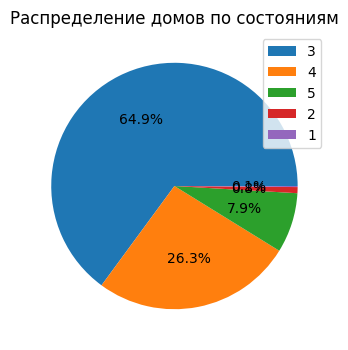

In [107]:
data = df['condition'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Распределение домов по состояниям')
plt.legend(data.index);

### Вывод
Из графика видно, что значительная часть домов находиться в удовлетворительном состоянии (3)

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

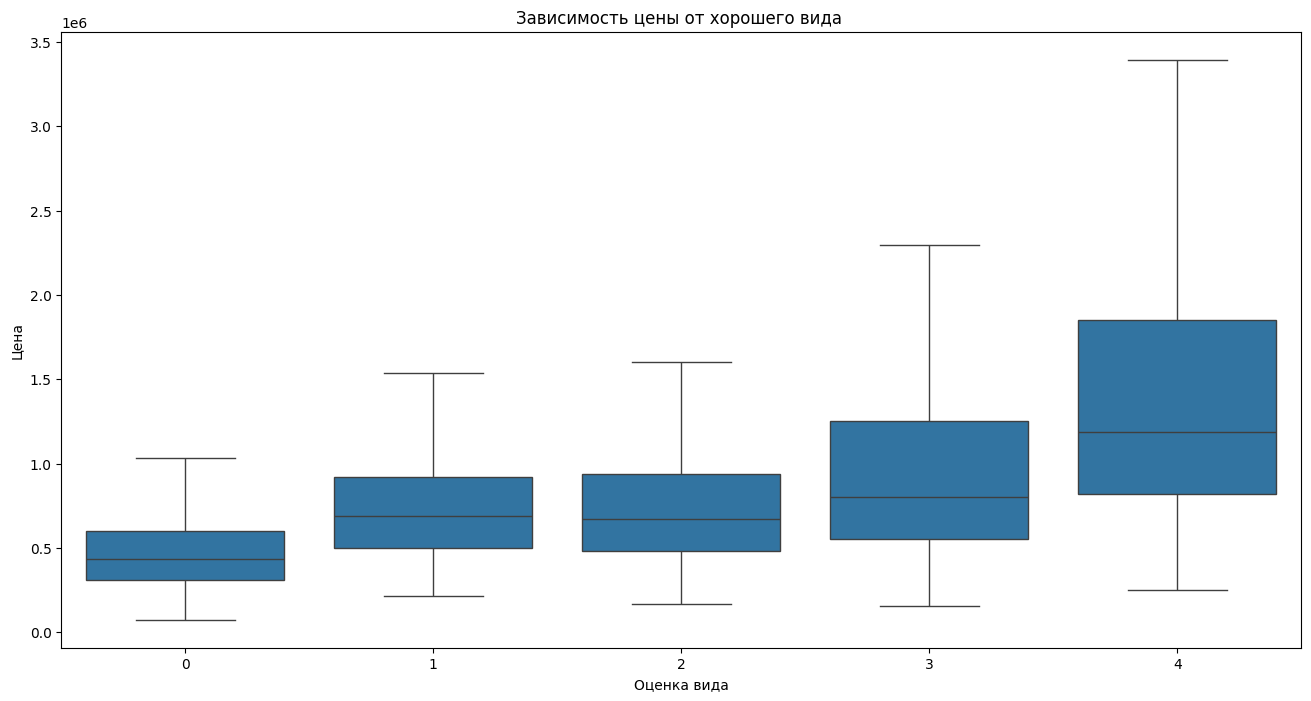

In [64]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['view'], y=df['price'], showfliers=False)
plt.title('Зависимость цены от хорошего вида ')
plt.xlabel('Оценка вида')
plt.ylabel('Цена');

Данный график нам показывает, что чем выше оценка вида из дома тем выше его средняя цена. Единственное исключение виды 1 и 2 разница в цене не вилика.

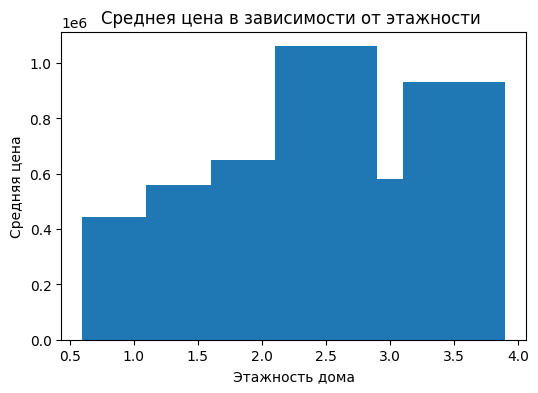

In [118]:
fl=df.groupby('floors').agg({'price': 'mean'}).reset_index()
plt.figure(figsize=(6, 4))
plt.bar(fl['floors'], fl['price'])
#sns.boxplot(x=fl['floors'], y=fl['price'], showfliers=False)
plt.title('Среднея цена в зависимости от этажности ')
plt.xlabel('Этажность дома')
plt.ylabel('Средняя цена');

Данный график нам показывает, что дома с мансардами/террасами на крыше (2,5 и 3,5 этажей) значительно дороже остальных предложений

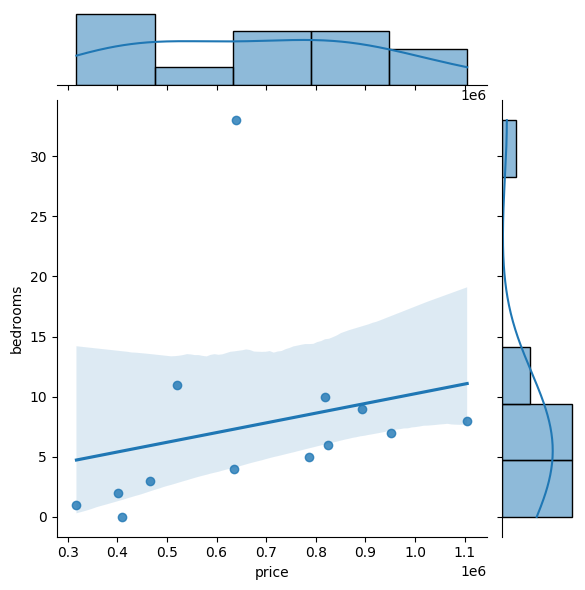

In [122]:
bf=df.groupby('bedrooms').agg({'price': 'mean'}).reset_index()
sns.jointplot(x=bf['price'], y=bf['bedrooms'], kind='reg');

Данный график нам показывает, что с некоторой погрешностью и в некотором диапазоне существует линейная зависимость средней цены от колличества спален в доме.

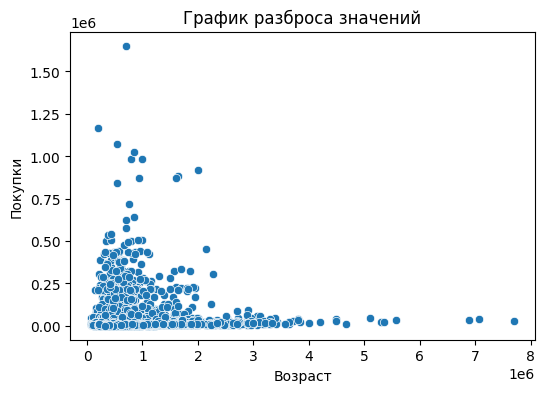

In [141]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['price'], y=df['sqft_lot'])
plt.title('График зависимости цены от площади помещения')
plt.xlabel('Цена')
plt.ylabel('Площадь помещения');

Данный график нам показывает некую анамалию - цена не зависит от общей площади помещения

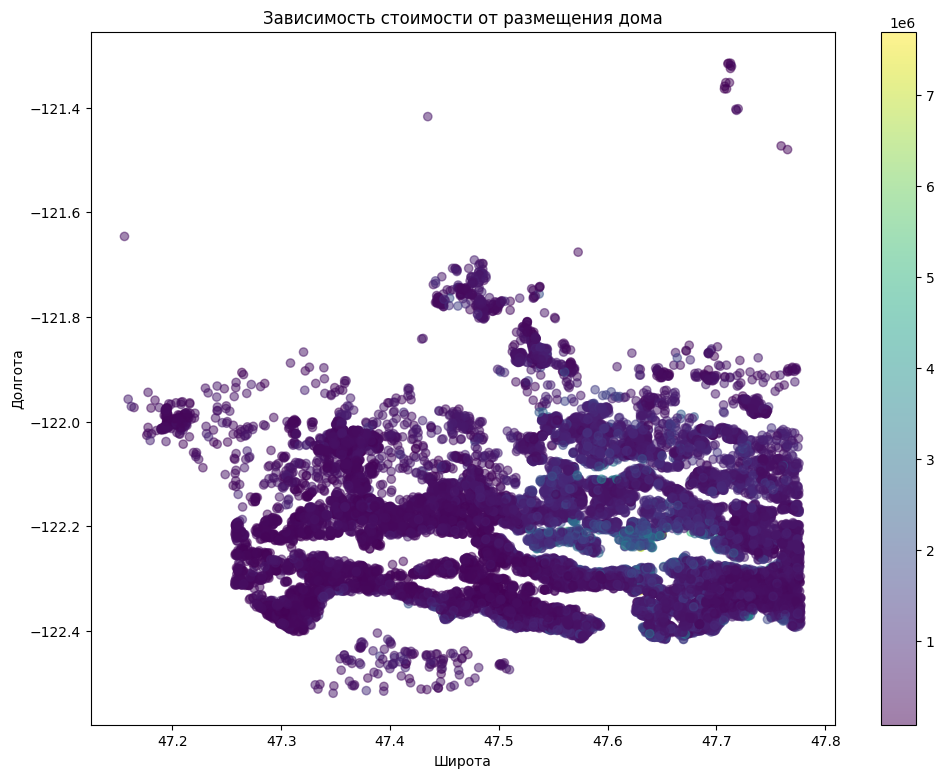

In [142]:
plt.figure(figsize=(12, 9))
sc = plt.scatter(df['lat'], df['long'], alpha=0.5, c=df['price'])
plt.colorbar(sc)
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.title("Зависимость стоимости от размещения дома");

Данный график нам показывает, что стоимость домов зависит от рельефа месности, и более высокая цена у заливов и подножий гор.

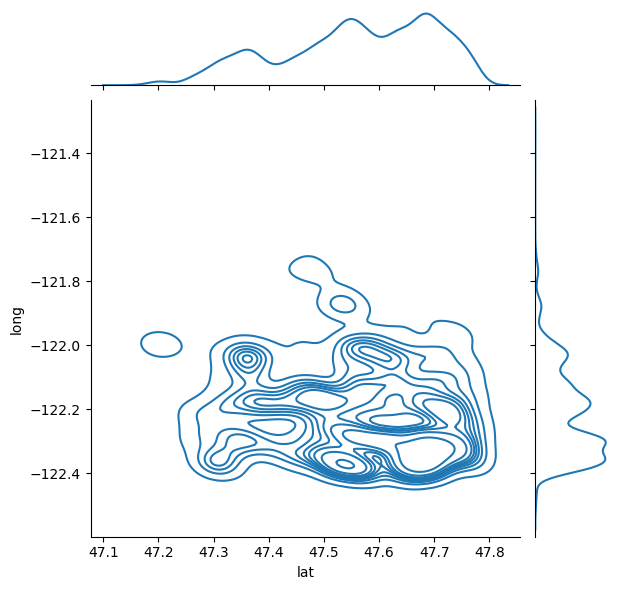

In [67]:
sns.jointplot(x=df['lat'], y=df['long'], kind='kde');

Данный график нам показывает, что дома сосредоточены в одной большой конгламерации в которую входят несколько более малых населенных пунктов.

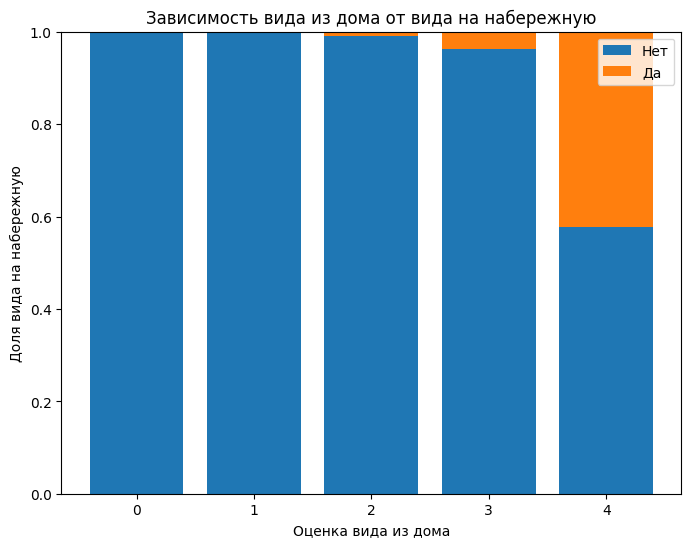

In [79]:
# Готовим данные для графика
data = pd.crosstab(df['view'], df['waterfront'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
plt.figure(figsize=(8, 6))
plt.bar(data['view'], data['no'])
plt.bar(data['view'], data['yes'], bottom=data['no'])
plt.title('Зависимость вида из дома от вида на набережную')
plt.xlabel('Оценка вида из дома')
plt.ylabel('Доля вида на набережную')
plt.legend(['Нет', 'Да']);

Данный график нам показывает, что доля положительной оценки вида из дома напрямую зависит от вида на набережную, в отличном виде почти половина домов имеет вид на набережную